In [5]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from lowAltitude_classification.gsd_utils import papermode

In [6]:
papermode(plt, 10, has_latex=True)
rc('text.latex', preamble=r'\usepackage{color}')
# Load the data
data = pd.read_csv('results/phase3-test-M2F_METRICS.csv')
data

,PL_Version,experiment,F1,pAcc
0,NaN,SUPERVISED,0.1331,0.2959
1,V1,BASE,0.4382,0.5550
2,NaN,MovingWINDOW,0.4069,0.5262
3,V1,FINETUNE,0.4556,0.5970
4,V2,FINETUNE,0.3386,0.4524
5,V2,BASE,0.3785,0.4835


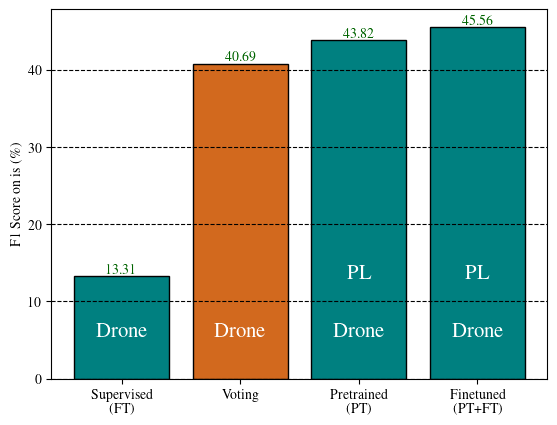

In [7]:
results_f1 = {
    'Supervised\n(FT)': data.iloc[0]['F1'],
    'Voting': data.iloc[2]['F1'],
    'Pretrained\n(PT)': data.iloc[1]['F1'],
    'Finetuned\n(PT+FT)': data.iloc[3]['F1'],
}

results_f1 = {k: round(v, 4) * 100 for k, v in results_f1.items()}

for k, v in results_f1.items():
    bar = plt.bar(k, v, color="teal" if k != 'Voting' else 'chocolate', edgecolor="black")
    plt.bar_label(bar, color="darkgreen")
    
    plt.text(bar[0].get_x() + bar[0].get_width() / 2, 5, f"Drone", ha='center', va='bottom', color="white", fontsize=15)
    if k == 'Pretrained\n(PT)' or k == 'Finetuned\n(PT+FT)':
        plt.text(bar[0].get_x() + bar[0].get_width() / 2, 12.5, f"PL", ha='center', va='bottom', color="white", fontsize=15)
plt.grid(True, axis="y", color="k", zorder=0, linestyle="--")
plt.ylabel(r"F1 Score on \textcolor{green}{is} (\%)")
plt.show()
